# 三、 MCMC采样和M-H采样
+ 在MCMC(二)马尔科夫链中我们讲到给定一个概率平稳分布𝜋, 很难直接找到对应的马尔科夫链状态转移矩阵𝑃。而只要解决这个问题，我们就可以找到一种通用的概率分布采样方法，进而用于蒙特卡罗模拟。本篇我们就讨论解决这个问题的办法：MCMC采样和它的易用版M-H采样。

## 1. 马尔可夫链的细致平稳条件
+ 在解决从平稳分布$\pi$，找到对应马尔可夫链状态转移矩阵P之前，来看马尔可夫链细致平稳条件：
+ 如果非周期马尔可夫链的状态转移矩阵P和概率分布$\pi(x)$对于所有的i，j满足：
$$\pi(i)P(i,j)=\pi(j)P(j,i) \tag{1}$$
+ 则称概率分布$\pi(x)$是状态转移矩阵P的平稳分布

+ 由细致平稳条件证明平稳分布：
+ 对（1）式两边同时对i求和：
$$\displaystyle \sum_{i=1}^{\infty}\pi(i)P(i,j) = \sum_{i=1}^{\infty}\pi(j)P(j,i) = \pi(j)\sum_{i=1}^{\infty}\pi(j,i)=\pi(j) \tag{2}$$

+ (2)式写成矩阵式，即：

$$\displaystyle \sum_{i=1}^{\infty}\pi(i)P(i,j) = \begin{bmatrix} \pi(1),\pi(2),\ldots,\pi(i),\cdots \end{bmatrix} \cdot \begin{bmatrix} \begin{array}{ccc:c:c}
P_{11} & P_{12} & \cdots & P_{1j} & \cdots \\
P_{21} & P_{22} & \cdots & P_{2j} & \cdots \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
P_{j1} & P_{j2} & \cdots & P_{jj} & \cdots \\
P_{n1} & P_{n2} & \cdots & P_{nj} & \cdots \\
\end{array}\end{bmatrix} = \begin{bmatrix} \pi'(1),\pi'(2), \cdots, \pi'(j),\cdots \end{bmatrix} \tag{3}$$

$$\pi P = \pi \tag{4}$$

+ 仅仅从细致平稳条件还是很难找到合适的矩阵𝑃。比如我们的目标平稳分布是𝜋,随机找一个马尔科夫链状态转移矩阵𝑄,它是很难满足细致平稳条件的，即：
$$\pi(i)Q(i,j) \neq \pi(j)Q(j,i) \tag{5} $$
+ 那么如何使这个等式满足呢？下面我们来看MCMC采样如何解决这个问题。

## 2. MCMC采样
+ 可以对(5)式做一个改造，使细致平稳条件成立。方法是引入一个𝛼(𝑖,𝑗), 使上式可以取等号，即：
$$\pi(i)Q(i,j)\alpha(i,j) = \pi(j)Q(j,i)\alpha(j,i) \tag{6} $$

+ 这样，我们就得到了我们的分布𝜋对应的马尔科夫链状态转移矩阵𝑃，满足：
$$P(i,j) = Q(i,j)\alpha(i,j) \tag{7} $$

+ 也就是说，我们的目标矩阵𝑃可以通过任意一个马尔科夫链状态转移矩阵𝑄乘以𝛼(𝑖,𝑗)得到。𝛼(𝑖,𝑗)我们一般称之为接受率。取值在[0,1]之间，可以理解为一个概率值。即目标矩阵𝑃可以通过任意一个马尔科夫链状态转移矩阵𝑄以一定的接受率获得。这个很像我们在MCMC(一)蒙特卡罗方法第4节讲到的接受-拒绝采样，那里是以一个常用分布通过一定的接受-拒绝概率得到一个非常见分布，这里是以一个常见的马尔科夫链状态转移矩阵𝑄通过一定的接受-拒绝概率得到目标转移矩阵𝑃,两者的解决问题思路是类似的。

+ MCMC的采样过程:
  + 1.输入我们任意选定的马尔科夫链状态转移矩阵𝑄，平稳分布𝜋(𝑥)，设定状态转移次数阈值$n_1$，需要的样本个数$n_2$;
  + 2.从任意简单概率分布采样得到初始状态值$x_0$;
  + 3.for 𝑡=0 to $n_1+n_2-1$: 
    + a、从条件概率分布$Q(x|x_t)$中采样得到样本$x_*$;
    + b、从均匀分布采样$𝑢∼𝑢𝑛𝑖𝑓𝑜𝑟𝑚[0,1]$;
    + c、如果$u<\alpha(x_t,x_*) = \pi(x_*)Q(x_*,x_t) $，则接受转移$x_t \to x_*$，即$x_{t+1}=x_*$;
    + d、否则不接受转移，即$x_{t+1} = x_t$.
  + 样本集$(x_{n_1},x_{n_1+1},\cdots,x_{n_1+n_2-1})$即为我们需要的平稳分布对应的样本集。

## 3. M-H采样
+ M-H采样是Metropolis-Hastings采样的简称，这个算法首先由Metropolis提出，被Hastings改进，因此被称之为Metropolis-Hastings采样或M-H采样
+ M-H采样解决了我们上一节MCMC采样接受率过低的问题。

+ 回顾MCMC采样的细致平稳条件：
$$\pi(i)Q(i,j)\alpha(i,j) = \pi(j)Q(j,i)\alpha(j,i) \tag{8} $$
+ 如果$\alpha(i,j)$太小，会容易拒绝，采样效率很低，但是等式两边同时扩大到较大的值先等于1，等式依然成立，提高了采样效率；

$$\pi(i)Q(i,j)\times 0.1 = \pi(j)Q(j,i)\alpha(j,i) \times 0.2 \tag{9} $$
+ (9)式两边同时扩大5倍依然成立，但是接受率却提高了5倍：
$$\pi(i)Q(i,j)\times 0.5 = \pi(j)Q(j,i)\times 1 \tag{10} $$
+ (10)式稍做改进，令：
$$\alpha(i,j) = min\{\frac{\pi(j)Q(j,i)}{\pi(i)Q(i,j)},1\} \tag{11} $$

+ 通过这个微小的改造，我们就得到了可以在实际应用中使用的M-H采样算法过程如下：
  + 1. 输入我们任意选定的马尔科夫链状态转移矩阵𝑄，平稳分布𝜋(𝑥)，设定状态转移次数阈值$n_1$，需要的样本个数$n_2$;
  + 2. 从任意简单概率分布采样得到初始状态值$x_0$;
  + 3. for $t=0 \to n_1+n_2-1$: 
    + a. 从条件概率分布$Q(x|x_t)$中采样得到样本$x_*$;
    + b. 从均匀分布采样$u \sim uniform(0,1)$;
    + c. 如果$u<\alpha(x_t,x_*) = min\{\frac{\pi(x_*)Q(x_*,x_t)}{\pi(x_t)Q(x_t,x_*)},1\}$，则接受转移$x_t \to x_*$，即$x_{t+1}=x_*$;
    + d. 否则不接受转移，即$x_{t+1}=x_t$;
  + 样本集$(x_{n_1},x_{n_2},\cdots,x_{n_1+n_2-1})$即为我们需要的平稳分布对应的样本集。
+ 很多时候，我们选择的马尔科夫链状态转移矩阵𝑄如果是对称的，即满足$Q(i,j)=Q(j,i)$，这时我们的接受率可以进一步简化为：
$$\alpha(x_t,x_*) = min\{\frac{\pi(x_*)}{\pi(x_t)},1\} \tag{12}$$

## 4. M-H采样示例
+ 在例子里，我们的目标平稳分布是一个均值3，标准差2的正态分布，而选择的马尔可夫链状态转移矩阵𝑄(𝑖,𝑗)的条件转移概率是以𝑖为均值,方差1的正态分布在位置𝑗的值。这个例子仅仅用来让大家加深对M-H采样过程的理解。毕竟一个普通的一维正态分布用不着去用M-H采样来获得样本。
  + 平稳分布$\pi(x)$即$x \sim N(3, 2^2)$，从该分布中取样；
  + 转移矩阵$Q(i,j)=Q(x_i,x_j)$的表示$x_i$转移到$x_j$的概率，即$x \sim N(x_i,1)$的条件下$P(x = x_j)$值；
    + 实例算法中$Q(x_t,x_*)$表示$x_t$转移到$x_*$的概率，即在$x \sim N(x_t,1)$的条件下:
$$Q(x_t,x_*)=P(x = x_*|x = x_t)=\Phi(\frac{x_*-x_t}{1}) \tag{13}$$
  + $Q(x_*|x_t) \sim N(x_t,\sigma^2)$，从$N(x_t,\sigma^2)$中抽取$x_*$；
    + 计算$\alpha = \frac{\pi(x_*)}{\pi(x_t)}$，$如果$u<\alpha$，则接受，取$x_{t+1}=x_*$，此时假设的是$Q(i,j)$是对称的；
    + 计算$\alpha = \frac{\pi(x_*)Q(x_*,x_t)}{\pi(x_t)Q(x_t,x_*)}$，$如果$u<\alpha$，则接受，取$x_{t+1}=x_*$，此时$Q(i,j)$是一般化的；

+ 代码如下：
  + 简化的$\alpha = \frac{\pi(x_*)}{\pi(x_t)}$，此时假设的是$Q(x_t,x_*)=Q(x_*,x_t)$是对称的；

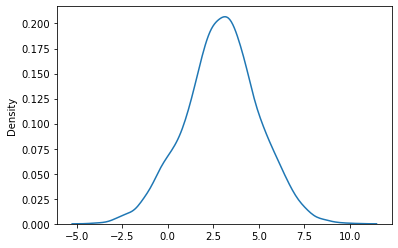

In [57]:
import random
import math
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

def prob(x):
    y = norm.pdf(x, loc = 3,scale = 2)  # π(x)~N(3,4)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T - 1:
    t = t + 1
    pi_star = norm.rvs(loc = pi[t - 1], scale = sigma, size = 1, random_state = None) # norm.rvs抽取容量为size的N(loc,scale)的样本，此处Q(x*|xt)～N(xt,1),在xt的条件下抽出x*
    alpha = min(1,prob(pi_star[0]) / prob(pi[t - 1])) # å = π(x*)/π(xt)
    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]

# plt.scatter(pi,norm.pdf(pi, loc = 5, scale = 2))
# plt.hist(pi, 50, color='red', alpha=0.7, density=True)
sns.kdeplot(pi)
plt.show()

+ 完整的接受率：$\alpha=\frac{\pi(x_*)Q(x_*,x_t)}{\pi(x_t)Q(x_t,x_*)}$，$Q(x_t,x_*) = Q(x_*|x_t),\quad x \sim N(x_t,1)$

u = 2.9191541478549814 sd = 2.005742472663968


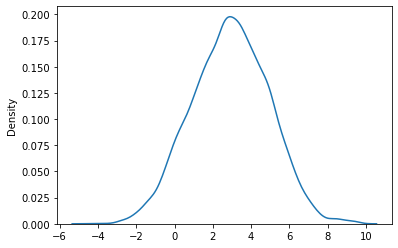

In [58]:
import random
import math
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

def prob_p(x):
    y = norm.pdf(x, loc = 3,scale = 2)  # π(x)~N(3,4)
    return y

def prob_q(x,u):
    y = norm.pdf(x, loc = u,scale = 1)  # q(u,x) = q(x|u)~N(u,1)
    return y

T = 10000
pi = [0 for i in range(T)]
t = 0
while t < T - 1:
    t = t + 1
    pi_star = norm.rvs(loc = pi[t - 1], scale = 1, size = 1, random_state = None) 
    alpha = min(1,(prob_p(pi_star[0])*prob_q(pi[t-1],pi_star[0])) / (prob_p(pi[t - 1])*prob_q(pi_star[0],pi[t - 1]))) # å = π(x*)Q(x*,xt)/π(xt)Q(xt,x*)
    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]
print("u =", np.mean(pi),"sd =", np.std(pi))
sns.kdeplot(pi)
plt.show()

+ 平稳分布为指数分布

u = 1.0174342109054395 sd = 1.040391399420437


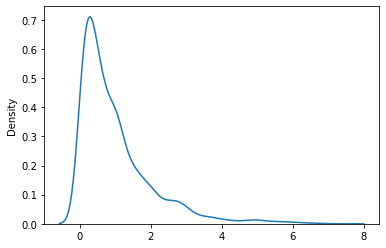

In [61]:
import random
import math
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

def prob_p(x):
    y = expon.pdf(x)
    return y

def prob_q(x,u):
    y = norm.pdf(x, loc = u,scale = 1)  # q(u,x) = q(x|u)~N(u,1)
    return y

T = 5000
pi = [0 for i in range(T)]
t = 0
while t < T - 1:
    t = t + 1
    pi_star = norm.rvs(loc = pi[t - 1], scale = 1, size = 1, random_state = None) 
    alpha = min(1,(prob_p(pi_star[0])*prob_q(pi[t-1],pi_star[0])) / (prob_p(pi[t - 1])*prob_q(pi_star[0],pi[t - 1]))) # å = π(x*)Q(x*,xt)/π(xt)Q(xt,x*)
    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]
print("u =", np.mean(pi),"sd =", np.std(pi))
sns.kdeplot(pi)
plt.show()

+ 平稳分布为卡方分布

u = 2.377164486438232 sd = 2.063324541620767


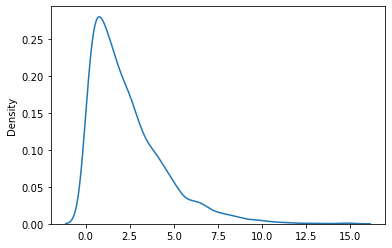

In [87]:
import random
import math
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import chi2
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns

def prob_p(x):
    y = chi2.pdf(x, df = 2)  # x(2)
    return y

T = 5000
pi = [0 for i in range(T)]
t = 0
while t < T - 1:
    t = t + 1
    pi_star = norm.rvs(loc = pi[t - 1], scale = 1, size = 1, random_state = None) 
    alpha = min(1,prob_p(pi_star[0]) / prob_p(pi[t - 1]))
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]
print("u =", np.mean(pi),"sd =", np.std(pi))
sns.kdeplot(pi)
plt.show()

## 5. M-H采样总结
+ M-H采样完整解决了使用蒙特卡罗方法需要的任意概率分布样本集的问题，因此在实际生产环境得到了广泛的应用。
+ 但是在大数据时代，M-H采样面临着两大难题：
  + 1. 我们的数据特征非常的多，M-H采样由于接受率计算式𝜋(𝑗)𝑄(𝑗,𝑖)𝜋(𝑖)𝑄(𝑖,𝑗)的存在，在高维时需要的计算时间非常的可观，算法效率很低。同时𝛼(𝑖,𝑗)一般小于1，有时候辛苦计算出来却被拒绝了。能不能做到不拒绝转移呢？
  + 2. 由于特征维度大，很多时候我们甚至很难求出目标的各特征维度联合分布，但是可以方便求出各个特征之间的条件概率分布。这时候我们能不能只有各维度之间条件概率分布的情况下方便的采样呢？
+ Gibbs采样解决了上面两个问题，因此在大数据时代，MCMC采样基本是Gibbs采样的天下，下一篇我们就来讨论Gibbs采样。

[1.99342831] [1, 1.9934283060224653]
[1.7168997] [1, 1.9934283060224653, 1.7168997036800961]
[1.24859295] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242]
[0.78031904] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242, 0.780319040335063]
[3.93874467] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242, 0.780319040335063, 3.9387446713498457]
[5.47361413] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242, 0.780319040335063, 3.9387446713498457, 3.9387446713498457]
[2.9997959] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242, 0.780319040335063, 3.9387446713498457, 3.9387446713498457, 2.9997958994799414]
[4.08491599] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242, 0.780319040335063, 3.9387446713498457, 3.9387446713498457, 2.9997958994799414, 4.084915986651871]
[4.56884053] [1, 1.9934283060224653, 1.7168997036800961, 1.2485929542334242, 0.780319040335063, 3.9387446713498457, 3.9387446713498457, 2.99979589947994

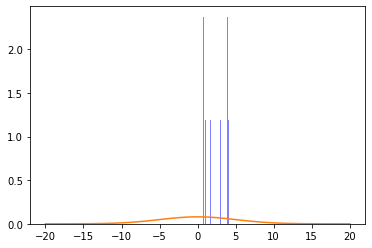

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(42)
# 正态分布
x_=np.linspace(-20,20,100)
y_=stats.norm.pdf(x_,0,5)# 正态分布
# y_=stats.expon(scale=1).pdf(x_)# 指数分布

# 采样数10000
Samp_Num=10
result=[]
init=1
result.append(init)
# p=lambda r:stats.expon(scale=1).pdf(r)# 指数分布
p=lambda r:stats.norm.pdf(r,0,5) # 正态分布
# 生成均值为v,标准差为2的正态分布的1个样本
q=lambda v:stats.norm.rvs(loc = v,scale = 2, size = 1)

for i in range(Samp_Num):
    y=q(result[i])# 从分布q(y|x_t)中随机采样一个样本点
    alpha=min(1,p(y)/p(result[i]))# 接受概率(简化)
    u=np.random.rand(1)# 从uniform(0,1)中采样
    if u<alpha:
        result.append(y[0])# 接受
    else:
        result.append(result[i])# 拒绝
    print(y,result)

plt.hist(result, 50, density=1, facecolor='blue', alpha=0.5)
plt.plot(x_,y_)
plt.show()


<AxesSubplot:>

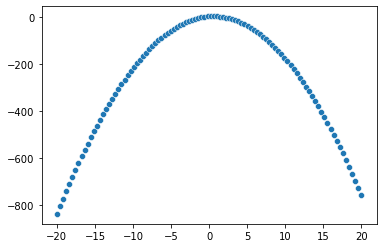

In [117]:
x1 = np.linspace(-20,20,100)
p=lambda x : -2*x*x+2*x+3
y1=p(x1)
sns.scatterplot(x=x1,y=y1)